### Business Objectives

***Central banks collecting information about customer satisfaction with the services provided by different bank. Also collects the information about the complaints.***


***The objective of the case study is to analyze customer reviews and predict customer satisfaction with the reviews***

- Data processing
- Key positive words/negative words (most frequent words)
- Classification of reviews into positive, negative and neutral
- Identify key themes of problems (using clustering, topic models)
- Predicting star ratings using reviews.
- Perform intent analysis

### Dataset

***The data is a detailed dump of customer reviews/complaints (~500) of different services at different banks***

- Date (Day the review was posted)
- Stars (1–5 rating for the business)
- text (Review text)
- bank name

### Import Important library.

In [3]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords

In [5]:
df = pd.read_excel("BankReviews.xlsx")
df.head()

,Date,Stars,Reviews,BankName
0,2017-04-10,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage
1,2017-02-10,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage
2,2017-08-21,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage
3,2017-12-17,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage
4,2016-05-27,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage


In [6]:
# Dropping the irrelevant variables
df.drop(['Date','BankName'],axis=1,inplace=True)

In [7]:
df.head(3)

,Stars,Reviews
0,5,"Great job, Wyndham Capital! Each person was pr..."
1,5,Matthew Richardson is professional and helpful...
2,5,We had a past experience with Wyndham Mortgage...


In [8]:
df.shape

(505, 2)

### Define X and Y

In [9]:
X,y=df.Reviews,df.Stars

In [10]:
X.head()

0    Great job, Wyndham Capital! Each person was pr...
1    Matthew Richardson is professional and helpful...
2    We had a past experience with Wyndham Mortgage...
3    We have been dealing with Brad Thomka from the...
4    I can't express how grateful I am for the supp...
Name: Reviews, dtype: object

In [11]:
y.head()

0    5
1    5
2    5
3    5
4    5
Name: Stars, dtype: int64

In [12]:
# Pickling the dataset

import pickle
with open('Review.pickle','wb') as f:
    pickle.dump(X,f)
    
with open('sent.pickle','wb') as f:
    pickle.dump(y,f)

In [13]:
# Unpickling dataset
X_in = open('Review.pickle','rb')
y_in = open('sent.pickle','rb')
X = pickle.load(X_in)
y = pickle.load(y_in)

In [14]:
# Creating the corpus
import re
corpus = []
for i in range(0, len(X)):
    review = re.sub(r'\W', ' ', str(X[i]))
    review = review.lower()
    review = re.sub(r'^br$', ' ', review)
    review = re.sub(r'\s+[a-z]\s+', ' ',review)
    review = re.sub(r'^[a-z]\s+', '', review)
    review = re.sub(r'\s+', ' ', review)
    corpus.append(review)  

In [15]:
X[0]

'Great job, Wyndham Capital! Each person was professional and helped us move through our refinance process smoothly. Thank you!'

In [16]:
corpus[1]

'matthew richardson is professional and helpful he helped us find the correct product for our mortgage thank you very much for the excellent service matthew '

In [17]:
from nltk.stem import WordNetLemmatizer
# sentences = nltk.sent_tokenize(paragraph)
lemmatizer = WordNetLemmatizer()

# Lemmatization
for i in range(len(corpus)):
    words = nltk.word_tokenize(corpus[i])
    words = [lemmatizer.lemmatize(word) for word in words]
    corpus[i] = ' '.join(words)   

### Creating Tf - Idf model

In [18]:
# Creating the Tf-Idf model
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features = 2000, min_df = 0.05, max_df = 0.8, stop_words = stopwords.words('english'))
X = vectorizer.fit_transform(corpus).toarray()

In [19]:
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.33245169,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.12340384, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.1137738 , 0.08430181,
        0.1272345 ]])

In [20]:
X.shape

(505, 137)

### Apply Logistic regression

In [22]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y=train_test_split(X,
                                              y,
                                              test_size=.3,
                                              random_state=42)

In [23]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit( train_x, train_y )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Model Accuracy Eveluation

In [25]:
#Evelution of train and test accuracy
from sklearn import metrics
test_accuracy=metrics.accuracy_score(test_y,logreg.predict(test_x))
print('test_accuracy: ',test_accuracy)

train_accuracy=metrics.accuracy_score(train_y,logreg.predict(train_x))
print('train_accuracy: ',train_accuracy)

test_accuracy:  0.881578947368421
train_accuracy:  0.9178470254957507


Text(0.5, 15.0, 'Predicted label')

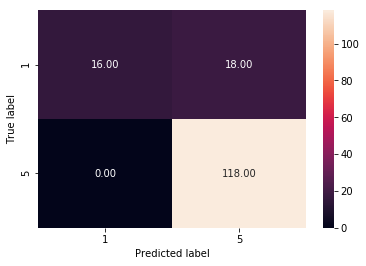

In [28]:
# Creating a confusion matrix

from sklearn import metrics

cm = metrics.confusion_matrix(test_y,
                            logreg.predict(test_x), [1,5] )
cm

import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["1", "5"] , yticklabels = ["1", "5"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

***As we can see from confusion matrix our model is not over fitted***

### Final Prediction

In [29]:
#Concatenating final prediction with original data set(all obersvations):

pred_stars=pd.DataFrame(logreg.predict(X),columns=['predicted_stars'])
  
testfile = pd.concat([df, pred_stars], axis=1)

testfile.head(10)

,Stars,Reviews,predicted_stars
0,5,"Great job, Wyndham Capital! Each person was pr...",5
1,5,Matthew Richardson is professional and helpful...,5
2,5,We had a past experience with Wyndham Mortgage...,5
3,5,We have been dealing with Brad Thomka from the...,5
4,5,I can't express how grateful I am for the supp...,5
5,5,I had the pleasure of working with Wyndham Cap...,5
6,5,My experience with Mattison was beyond greatly...,5
7,5,Patrick answered all my questions by email imm...,5
8,5,I loved working with this group of people! The...,5
9,5,Great web interface for both the loan applicat...,5


### Final Submission in excel file

In [30]:
#Exporting testfile to csv for final submission

testfile.to_csv('Review_submission.csv',index=False)